In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

Написать программу для численного решения задачи Коши для системы ОДУ с использованием двухслойной схемы с весом при решении системы нелинейнх уравнений на новом временном слое методлом Ньютона. Использовать эту программу для решения задачи Коши
$$\frac{dy_1}{dt} = y_1 - y_1y_2$$
$$\frac{dy_2}{dt} = -y_2 + y_1y_2$$
$$0<t\leq 10$$
$$y_1(0) = 2,\ y_2(0) = 2$$

Рассмотрим неявных методов 2-го порядка для решения данной системы ОДУ:
$$ \frac{{\bf y}_{n+1} - {\bf y}_{n}}{\tau} = \alpha {\bf f}( t_n, y_{n+1} ) + (1 - \alpha) * {\bf f}( t_n, y_{n} ), $$

где $ {\bf y} = (y_1,\ y_2)^T $. При $ \alpha = 0.5 $, это методом Адамса 2-го порядка.

Если решение данной разнастной схемы сходится к решению исходной системы ОДУ, то для кажого временного слоя ( значения $n$ ) верно выражение $y_{n+1} - \tau * \alpha * {\bf f}( t_n, y_{n+1} ) - y_n - \tau *(1 - \alpha) * {\bf f}( t_n, y_{n} ) \approx 0$, таким образом решение ОДУ на каждом временном слое может быть получено как решение нелинейного уравнения неким итерационным процессом.

1) Составляем функцию, которую будем решать методом Ньютона на каждом временном слое

$$ F = y_{n+1} - \tau * \alpha * {\bf f}( t_n, y_{n+1} ) - y_n - \tau *(1 - \alpha) * {\bf f}( t_n, y_{n} ) \rightarrow 0\ если\ n \rightarrow \infty$$

где $${\bf f} = \left( \frac{dy_1}{dt}, \frac{dy_2}{dt} \right)^T =  ( y_1 - y_1y_2, -y_2 + y_1y_2 )^T$$

2) Начальное значение для итерационного процесса ${\bf y}^{(0)} = {\bf y}_n + \tau {\bf f}( t_n, y_{n} )$

In [6]:
def Jacobian( f, x ):

  h = 1.0e-4

  J = np.zeros( ( x.size, x.size ) )

  fn = f(x)

  for i in np.arange( 0, x.size, 1 ):

    x_old = np.copy( x )

    x_old[ i ] = x_old[ i ] + h

    fn_1 = f(x_old)

    J[:,i] = ( fn_1 - fn ) / h

  return J, fn

def NewtonMethod( f, x, eps = 1.0e-6 ):

  max_iter = 10000

  for i in np.arange( 0, max_iter, 1 ):

    J, fn = Jacobian( f, x )

    if np.sqrt( np.dot( fn, fn ) / x.size ) < eps:

      return x, i

    dx = np.linalg.solve( J, fn )

    x = x - dx

In [35]:
def Iterarion( f, y0, tBEG, tEND, tau, alpha ):

  def F(y_next):

    return y_next - tau * alpha * f(t[i], y_next) - y[i] - tau * ( 1. - alpha) * f( t[i], y[i] )

  t = np.arange( tBEG, tEND, tau )

  y = np.zeros( ( t.size, 2 ) )

  y[0] = y0

  for i in np.arange(0, t.size-1, 1):

    y_next = y[ i ] + tau * f( t[ i ], y[ i ] )

    y[ i + 1 ], iter = NewtonMethod( F, y_next )

  return t, y

In [36]:
def f(t, y):

  f_fun = np.zeros( 2 )

  f_fun[ 0 ] = y[ 0 ] - y[ 0 ] * y[ 1 ]

  f_fun[ 1 ] = -y[ 1 ] + y[ 0 ] * y[ 1 ]

  return f_fun

tBEG = 0.

tEND = 10.

tau = 0.001

y0 = np.asarray([ 2., 2. ])

alpha = 0.5

t, y = Iterarion( f, y0, tBEG, tEND, tau, alpha )

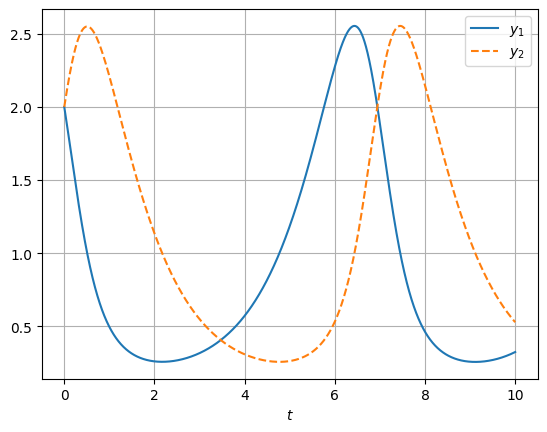

In [39]:
for n in np.arange(0,2,1):

  r = y[:,n]

  label = r'$y_1$'

  mark = '-'

  if n == 1:

    label = r'$y_2$'

    mark = '--'

  plt.plot( t, r, mark, label = label )

plt.legend()
plt.xlabel(r'$t$')
plt.grid()